# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn import tree
from Toolbox.treeprint import tree_print

rawWine = io.loadmat('Data/wine.mat')
wine = rawWine['X']
wineClass = rawWine['y'].ravel()
attName = rawWine['attributeNames']
className = rawWine['classNames']
attList = [nested_array[0] for nested_array in attName[0]]
classList = [nested_array[0][0] for nested_array in className]
print(attList, '\n\n', classList)

['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol'] 

 ['Red', 'White']


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [42]:
clf = tree.DecisionTreeClassifier(min_samples_split=100)
clf = clf.fit(wine, wineClass)
tree_print(clf, attList, classList)

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

----
Changing the $\textit{min_samples_split}$ parameter directly influences the shape of the tree as it changes the minimum number of samples necessary to split up a node. A lower value results in more splitting and thus more branches per level of the tree, making it 'wider' and to some extent deeper. A higher value causes the exact opposite, a more narrow and slightly more shallow tree as less nodes are split in total.

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [43]:
print(classList[clf.predict([[6.9,1.09,.06,2.1,.0061,12,31,.99,3.5,.64,12]])[0]])

White


----
The sample is classified as 'White' based on total sulfur dioxide, chlorides and sulphates (in this order).

----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [44]:
predWine = clf.predict(wine)
predResult = np.equal(wineClass, predWine)

print(np.count_nonzero(predResult == True)/len(predResult))

0.9868337563451777


----
Out of 6304 samples 6221 are classified correctly, yielding a $98.68337563451777$% success rate. 

----

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rawWine = io.loadmat("Data/wine.mat")
X_wine = rawWine["X"]
y_wine = rawWine["y"].ravel()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_wine,y_wine)

depth = np.arange(2,21)
errortrain1 = np.zeros(len(depth))
errortest1 = np.zeros(len(depth))

for i in range(0,len(depth)):
    clf = DecisionTreeClassifier(max_depth=depth[i])
    clf.fit(X_train1, y_train1)
    
    y_pred_train1 =  clf.predict(X_train1)
    y_pred_test1 =  clf.predict(X_test1)
    
    errortrain1[i] = 1 - accuracy_score(y_train1, y_pred_train1)
    errortest1[i] = 1 - accuracy_score(y_test1, y_pred_test1)

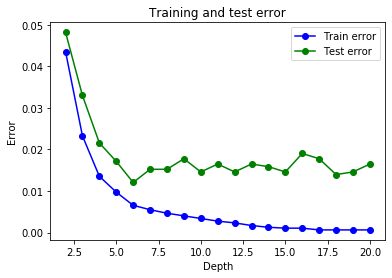

In [46]:
plt.title('Training and test error')
plt.plot(depth, errortrain1, 'bo-', label = 'Train error')
plt.plot(depth, errortest1, 'go-', label = 'Test error')
plt.legend(loc = 'upper right')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.show()

----
>The optimal tree depth changes after every run, but seems to range between 6 and 20. This fluctuation is also noted in the notes on the DecisionTreeClassifier, as the used split critera is np.random.

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


In [47]:
from sklearn.model_selection import KFold
idx = 0
folds = 10
depth = np.arange(2,21)

errortrain2 = np.zeros([folds, len(depth)])
errortest2 = np.zeros([folds, len(depth)])

kf = KFold(n_splits=folds)
for train2, test2 in kf.split(X_wine):

    print("%s %s" % (train2, test2))

    X_train2 = X_wine[train2]
    X_test2 = X_wine[test2]
    y_train2 = y_wine[train2]
    y_test2 = y_wine[test2]
    
    errorstrain2 = np.zeros(len(depth))
    errorstest2 = np.zeros(len(depth))

    for i in range(0,len(depth)):
        clf2 = DecisionTreeClassifier(max_depth=depth[i])
        clf2.fit(X_train2, y_train2)
 
        y_pred_train2 =  clf2.predict(X_train2)
        y_pred_test2 =  clf2.predict(X_test2)
 
        errorstrain2[i] = 1 - accuracy_score(y_train2, y_pred_train2)
        errorstest2[i] = 1 - accuracy_score(y_test2, y_pred_test2)
    
    errortrain2[idx,:] = errorstrain2
    errortest2[idx,:] = errorstest2
    idx += 1

[ 631  632  633 ... 6301 6302 6303] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

[   0    1    2 ... 6301 6302 6303] [1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906
 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920
 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934
 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948
 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046
 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060
 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074
 2075 2076 2077 2078 2079 2080 2081 2082 

[   0    1    2 ... 6301 6302 6303] [3784 3785 3786 3787 3788 3789 3790 3791 3792 3793 3794 3795 3796 3797
 3798 3799 3800 3801 3802 3803 3804 3805 3806 3807 3808 3809 3810 3811
 3812 3813 3814 3815 3816 3817 3818 3819 3820 3821 3822 3823 3824 3825
 3826 3827 3828 3829 3830 3831 3832 3833 3834 3835 3836 3837 3838 3839
 3840 3841 3842 3843 3844 3845 3846 3847 3848 3849 3850 3851 3852 3853
 3854 3855 3856 3857 3858 3859 3860 3861 3862 3863 3864 3865 3866 3867
 3868 3869 3870 3871 3872 3873 3874 3875 3876 3877 3878 3879 3880 3881
 3882 3883 3884 3885 3886 3887 3888 3889 3890 3891 3892 3893 3894 3895
 3896 3897 3898 3899 3900 3901 3902 3903 3904 3905 3906 3907 3908 3909
 3910 3911 3912 3913 3914 3915 3916 3917 3918 3919 3920 3921 3922 3923
 3924 3925 3926 3927 3928 3929 3930 3931 3932 3933 3934 3935 3936 3937
 3938 3939 3940 3941 3942 3943 3944 3945 3946 3947 3948 3949 3950 3951
 3952 3953 3954 3955 3956 3957 3958 3959 3960 3961 3962 3963 3964 3965
 3966 3967 3968 3969 3970 3971 3972 3973 

[   0    1    2 ... 5671 5672 5673] [5674 5675 5676 5677 5678 5679 5680 5681 5682 5683 5684 5685 5686 5687
 5688 5689 5690 5691 5692 5693 5694 5695 5696 5697 5698 5699 5700 5701
 5702 5703 5704 5705 5706 5707 5708 5709 5710 5711 5712 5713 5714 5715
 5716 5717 5718 5719 5720 5721 5722 5723 5724 5725 5726 5727 5728 5729
 5730 5731 5732 5733 5734 5735 5736 5737 5738 5739 5740 5741 5742 5743
 5744 5745 5746 5747 5748 5749 5750 5751 5752 5753 5754 5755 5756 5757
 5758 5759 5760 5761 5762 5763 5764 5765 5766 5767 5768 5769 5770 5771
 5772 5773 5774 5775 5776 5777 5778 5779 5780 5781 5782 5783 5784 5785
 5786 5787 5788 5789 5790 5791 5792 5793 5794 5795 5796 5797 5798 5799
 5800 5801 5802 5803 5804 5805 5806 5807 5808 5809 5810 5811 5812 5813
 5814 5815 5816 5817 5818 5819 5820 5821 5822 5823 5824 5825 5826 5827
 5828 5829 5830 5831 5832 5833 5834 5835 5836 5837 5838 5839 5840 5841
 5842 5843 5844 5845 5846 5847 5848 5849 5850 5851 5852 5853 5854 5855
 5856 5857 5858 5859 5860 5861 5862 5863 

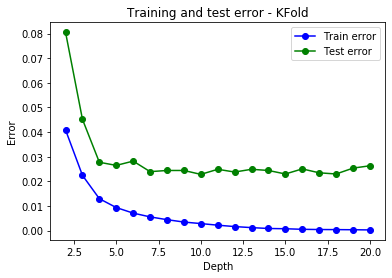

In [48]:
trainerror2 = np.mean(errortrain2, axis=0)
testerror2 = np.mean(errortest2, axis=0)

plt.title('Training and test error - KFold')
plt.plot(depth, trainerror2, 'bo-', label = 'Train error')
plt.plot(depth, testerror2, 'go-', label = 'Test error')
plt.legend(loc = 'upper right')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.show()

----
>The optimal tree depth is 8. This also varies accross multiple runs of the code.
----

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----
   >$$ \mbox{AUC} = {1 \over 5*5} \sum_{i=1}^m 3+4+4+5+5 = {21 \over 25} = 0.84.
$$
----

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [49]:
import pandas as pd

data = pd.read_excel("Data/classprobs.xls")
print(data.head())

X = data.values

   1.00000  0.88700   0.79706
0        0  0.13591  0.099401
1        0  0.55549  0.650750
2        0  0.23876  0.508570
3        0  0.14542  0.236290
4        1  0.81876  0.489490


#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

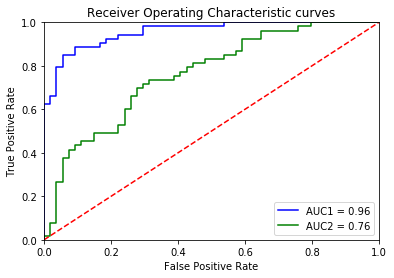

Figure: ROC-curves for both classifiers, where the red dashed line represents random guessing.


In [50]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(X[:,0], X[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(X[:,0], X[:,2])
roc_auc1 = metrics.auc(fpr, tpr)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.plot(fpr, tpr, 'b', label = 'AUC1 = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC2 = %0.2f' % roc_auc2)
plt.title('Receiver Operating Characteristic curves')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Figure: ROC-curves for both classifiers, where the red dashed line represents random guessing.')

----
>Both classifiers perform better than random guessing as we can see in the the image above.

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [51]:
t = X[:,0]
p1 = X[:,1]
p2 = X[:,2]

def AUC(t,p):
    m = p[t==1.0]
    n = p[t==0.0]
    o = 0.0
    
    for i in range(0, len(m)):
        for j in range(0, len(n)):
            if(m[i]>n[j]):
                o += 1.0
    return((1.0/(len(m)*len(n)))*o)

auc1 = AUC(t,p1)
auc2 = AUC(t,p2)
print('AUC classifier 1: ', auc1, '\nAUC classifier 2: ', auc2)

AUC classifier 1:  0.9556254367575122 
AUC classifier 2:  0.7613556953179594


----
>Not quite sure what 'this' baseline in the question refers to, but I'm going to assume it refers to random guessing. In that case, yes, the accuracy indicates both classifiers are better than the baseline, however, classifier one seems to perform better than classifier 2.
----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [52]:
threshold = 0.5

p1[p1>=threshold]=1
p1[p1<threshold]=0

p2[p2>=threshold]=1
p2[p2<threshold]=0

acc1 = accuracy_score(t, p1)
acc2 = accuracy_score(t, p2)

print('Accuracy classifier 1: ', acc1, '\nAccuracy classifier 2: ', acc2)

Accuracy classifier 1:  0.8598130841121495 
Accuracy classifier 2:  0.6915887850467289


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [53]:
table = np.zeros((2,2))

table[0,0] = sum(((p1 == 1) & (p2 == 1) & (t == 1)) + ((p1 == 0) & (p2 == 0) & (t == 0)))
table[1,0] = sum(((p1 == 1) & (p2 == 0) & (t == 0)) + ((p1 == 0) & (p2 == 1) & (t == 1)))
table[0,1] = sum(((p1 == 1) & (p2 == 0) & (t == 1)) + ((p1 == 0) & (p2 == 1) & (t == 0)))
table[1,1] = sum(((p1 == 0) & (p2 == 0) & (t == 1)) + ((p1 == 1) & (p2 == 1) & (t == 0)))

print(table)

[[66. 26.]
 [ 8.  7.]]


In [62]:
from scipy.stats import binom
N = len(t)
b = binom(N,0.5) 

p_value = b.cdf(min(table[0,1],table[1,0])) + (1-b.cdf(max(table[0,1],table[1,0])-1))

print('The p-value is {:.3f}'.format(p_value))

The p-value is 1.000


----
The p value seems to indicate that the algorithms are not significanty different.

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [55]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [56]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

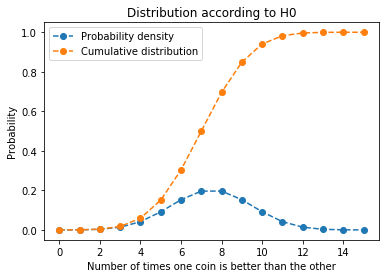

In [57]:
b = binom(N,0.5) #N=observations of inequality, 
 #p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [58]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.